In [4]:
pip install tensorflow --user

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2f/2f/3c84f675931ce3bcbc7e23acbba1e5d7f05ce769adab48322de57a9f5928/tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Usin

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import sklearn
import numpy as np
from sklearn.metrics import (mean_squared_error, mean_absolute_error,r2_score)
import pickle

In [6]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

IndexError: list index out of range

In [7]:
tf.__version__

'2.13.0'

In [8]:
df = pd.read_csv("Dataset.txt",na_values='?')

In [9]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


# EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [11]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car name        0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car name        0
dtype: int64

In [14]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [15]:
df['car name'].unique()

array(['chevrolet chevelle malibu ', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'plymouth satellite custom', 'chevrolet chevelle malibu',
       'ford torino 500', 'amc matador', 'pontiac catalina brougham',
       'dodge monaco (sw)', 'ford country squire (sw)',
       'pontiac safari (sw)', 'amc hornet sportabout (sw)',
       'chevrolet vega (sw)', 'pontiac firebird', 'ford mustang',
       'mercury capri 20

# Drop Car Name 

In [16]:
df.drop(['car name'],axis=1,inplace=True)

# Splitting in Train and Test

In [17]:
X=df.drop("mpg",axis=1)

In [18]:
Y=df['mpg']

In [19]:
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
394,4,97.0,52.0,2130,24.6,82,2
395,4,135.0,84.0,2295,11.6,82,1
396,4,120.0,79.0,2625,18.6,82,1


In [20]:
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

In [23]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
274,5,131.0,103.0,2830,15.9,78,2
157,8,350.0,145.0,4440,14.0,75,1
173,4,119.0,97.0,2545,17.0,75,3
357,4,119.0,100.0,2615,14.8,81,3
263,6,231.0,165.0,3445,13.4,78,1


In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [25]:
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [26]:
X_train_std

array([[-0.24893345, -0.57765698, -0.02197412, ...,  0.11961844,
         0.54658592,  0.49337407],
       [ 1.52188861,  1.52787598,  1.06400983, ..., -0.55787761,
        -0.26938257, -0.74203461],
       [-0.83920747, -0.69302865, -0.17711468, ...,  0.51185299,
        -0.26938257,  1.72878276],
       ...,
       [ 0.34134057, -0.17385614,  0.15902321, ..., -1.05708522,
         1.36255441, -0.74203461],
       [ 1.52188861,  1.43173292,  1.45186124, ..., -2.6973388 ,
        -1.62933005, -0.74203461],
       [-0.83920747, -0.79878601, -0.74596341, ...,  0.44053762,
         1.36255441,  1.72878276]])

In [27]:
X_test_std

array([[ 1.52188861e+00,  2.00859127e+00,  1.83971265e+00,
         1.78911930e+00, -1.44931977e+00, -1.35734055e+00,
        -7.42034609e-01],
       [ 1.52188861e+00,  1.09523222e+00,  6.76158422e-01,
         1.04842530e+00, -5.86699954e-02,  8.18575415e-01,
        -7.42034609e-01],
       [ 3.41340567e-01,  3.83773597e-01,  1.59023209e-01,
         9.76305932e-02, -2.01300742e-01, -2.69382568e-01,
        -7.42034609e-01],
       [-8.39207472e-01, -1.01991504e+00, -8.75247218e-01,
        -1.20095793e+00,  4.40537616e-01,  2.74596424e-01,
         1.72878276e+00],
       [ 3.41340567e-01,  3.26087762e-01, -2.28828201e-01,
         9.83139770e-01,  1.22500672e+00, -2.69382568e-01,
        -7.42034609e-01],
       [ 3.41340567e-01,  5.66445406e-01, -6.68393133e-01,
         7.32680740e-01,  1.93816045e+00,  2.60692807e-03,
        -7.42034609e-01],
       [-8.39207472e-01, -1.14490101e+00, -9.01103979e-01,
        -1.59504513e+00,  8.68429855e-01, -1.35734055e+00,
         1.7287827

# saving SC transform

In [28]:
pickle.dump(sc, open('scaler.pkl', 'wb'))

In [29]:
Y_train

274    20.3
157    15.0
173    24.0
357    32.9
263    17.7
       ... 
64     15.0
328    30.0
341    23.5
11     14.0
356    32.4
Name: mpg, Length: 313, dtype: float64

In [30]:
Y_test

39     14.0
285    17.0
164    21.0
220    33.5
163    18.0
       ... 
17     21.0
82     23.0
58     25.0
344    39.0
283    20.2
Name: mpg, Length: 79, dtype: float64

In [31]:
X_train.keys()

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin'],
      dtype='object')

In [32]:
len(X_train.keys())

7

In [33]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 64,activation='relu',input_shape=[len(X_train.keys())]))
# Adding the second hidden layer
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units=1))
# Adding the output layer

# Compiling the ANN
model.compile(loss='mean_squared_error',
                optimizer='Adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13057 (51.00 KB)
Trainable params: 13057 (51.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# Fitting the ANN to the Training set
model_history=model.fit(X_train_std, Y_train, batch_size = 100,epochs = 1000)

Epoch 1/1000
4/4 [==============================] - 2s 12ms/step - loss: 603.1428 - mean_absolute_error: 23.2291 - mean_squared_error: 603.1428
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 583.0939 - mean_absolute_error: 22.7848 - mean_squared_error: 583.0939
Epoch 3/1000
4/4 [==============================] - 0s 7ms/step - loss: 557.6904 - mean_absolute_error: 22.1975 - mean_squared_error: 557.6904
Epoch 4/1000
4/4 [==============================] - 0s 9ms/step - loss: 522.0185 - mean_absolute_error: 21.3783 - mean_squared_error: 522.0184
Epoch 5/1000
4/4 [==============================] - 0s 4ms/step - loss: 473.4489 - mean_absolute_error: 20.1488 - mean_squared_error: 473.4489
Epoch 6/1000
4/4 [==============================] - 0s 9ms/step - loss: 406.8051 - mean_absolute_error: 18.3728 - mean_squared_error: 406.8051
Epoch 7/1000
4/4 [==============================] - 0s 8ms/step - loss: 319.8264 - mean_absolute_error: 15.9515 - mean_squared_error: 319.826

4/4 [==============================] - 0s 7ms/step - loss: 9.3518 - mean_absolute_error: 2.2293 - mean_squared_error: 9.3518
Epoch 60/1000
4/4 [==============================] - 0s 8ms/step - loss: 9.3271 - mean_absolute_error: 2.2198 - mean_squared_error: 9.3271
Epoch 61/1000
4/4 [==============================] - 0s 6ms/step - loss: 9.1396 - mean_absolute_error: 2.2097 - mean_squared_error: 9.1396
Epoch 62/1000
4/4 [==============================] - 0s 5ms/step - loss: 9.0141 - mean_absolute_error: 2.1950 - mean_squared_error: 9.0141
Epoch 63/1000
4/4 [==============================] - 0s 6ms/step - loss: 9.0398 - mean_absolute_error: 2.1861 - mean_squared_error: 9.0398
Epoch 64/1000
4/4 [==============================] - 0s 5ms/step - loss: 8.9110 - mean_absolute_error: 2.1728 - mean_squared_error: 8.9110
Epoch 65/1000
4/4 [==============================] - 0s 5ms/step - loss: 8.8773 - mean_absolute_error: 2.1665 - mean_squared_error: 8.8773
Epoch 66/1000
4/4 [======================

4/4 [==============================] - 0s 6ms/step - loss: 6.7545 - mean_absolute_error: 1.8502 - mean_squared_error: 6.7545
Epoch 118/1000
4/4 [==============================] - 0s 6ms/step - loss: 6.5398 - mean_absolute_error: 1.8005 - mean_squared_error: 6.5398
Epoch 119/1000
4/4 [==============================] - 0s 6ms/step - loss: 6.7279 - mean_absolute_error: 1.8076 - mean_squared_error: 6.7279
Epoch 120/1000
4/4 [==============================] - 0s 5ms/step - loss: 6.5471 - mean_absolute_error: 1.7989 - mean_squared_error: 6.5471
Epoch 121/1000
4/4 [==============================] - 0s 6ms/step - loss: 7.1185 - mean_absolute_error: 1.9256 - mean_squared_error: 7.1185
Epoch 122/1000
4/4 [==============================] - 0s 5ms/step - loss: 6.7286 - mean_absolute_error: 1.8826 - mean_squared_error: 6.7286
Epoch 123/1000
4/4 [==============================] - 0s 6ms/step - loss: 6.7097 - mean_absolute_error: 1.8533 - mean_squared_error: 6.7097
Epoch 124/1000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 5.5487 - mean_absolute_error: 1.6381 - mean_squared_error: 5.5487
Epoch 176/1000
4/4 [==============================] - 0s 6ms/step - loss: 5.5395 - mean_absolute_error: 1.6571 - mean_squared_error: 5.5395
Epoch 177/1000
4/4 [==============================] - 0s 5ms/step - loss: 5.4718 - mean_absolute_error: 1.6408 - mean_squared_error: 5.4718
Epoch 178/1000
4/4 [==============================] - 0s 6ms/step - loss: 5.3955 - mean_absolute_error: 1.6151 - mean_squared_error: 5.3955
Epoch 179/1000
4/4 [==============================] - 0s 5ms/step - loss: 5.3821 - mean_absolute_error: 1.6041 - mean_squared_error: 5.3821
Epoch 180/1000
4/4 [==============================] - 0s 6ms/step - loss: 5.3722 - mean_absolute_error: 1.5964 - mean_squared_error: 5.3722
Epoch 181/1000
4/4 [==============================] - 0s 5ms/step - loss: 5.4441 - mean_absolute_error: 1.5971 - mean_squared_error: 5.4441
Epoch 182/1000
4/4 [===============

4/4 [==============================] - 0s 9ms/step - loss: 4.6674 - mean_absolute_error: 1.5217 - mean_squared_error: 4.6674
Epoch 234/1000
4/4 [==============================] - 0s 6ms/step - loss: 4.5858 - mean_absolute_error: 1.4859 - mean_squared_error: 4.5858
Epoch 235/1000
4/4 [==============================] - 0s 5ms/step - loss: 4.6509 - mean_absolute_error: 1.4935 - mean_squared_error: 4.6509
Epoch 236/1000
4/4 [==============================] - 0s 6ms/step - loss: 4.4996 - mean_absolute_error: 1.4823 - mean_squared_error: 4.4996
Epoch 237/1000
4/4 [==============================] - 0s 6ms/step - loss: 4.5844 - mean_absolute_error: 1.5188 - mean_squared_error: 4.5844
Epoch 238/1000
4/4 [==============================] - 0s 6ms/step - loss: 4.6267 - mean_absolute_error: 1.5097 - mean_squared_error: 4.6267
Epoch 239/1000
4/4 [==============================] - 0s 6ms/step - loss: 4.8493 - mean_absolute_error: 1.5928 - mean_squared_error: 4.8493
Epoch 240/1000
4/4 [===============

4/4 [==============================] - 0s 6ms/step - loss: 3.9119 - mean_absolute_error: 1.3693 - mean_squared_error: 3.9119
Epoch 292/1000
4/4 [==============================] - 0s 6ms/step - loss: 4.4070 - mean_absolute_error: 1.4675 - mean_squared_error: 4.4070
Epoch 293/1000
4/4 [==============================] - 0s 6ms/step - loss: 4.0200 - mean_absolute_error: 1.3827 - mean_squared_error: 4.0200
Epoch 294/1000
4/4 [==============================] - 0s 6ms/step - loss: 3.9593 - mean_absolute_error: 1.3750 - mean_squared_error: 3.9593
Epoch 295/1000
4/4 [==============================] - 0s 6ms/step - loss: 3.9282 - mean_absolute_error: 1.3640 - mean_squared_error: 3.9282
Epoch 296/1000
4/4 [==============================] - 0s 9ms/step - loss: 4.1889 - mean_absolute_error: 1.4312 - mean_squared_error: 4.1889
Epoch 297/1000
4/4 [==============================] - 0s 6ms/step - loss: 3.9291 - mean_absolute_error: 1.3750 - mean_squared_error: 3.9291
Epoch 298/1000
4/4 [===============

4/4 [==============================] - 0s 6ms/step - loss: 3.7878 - mean_absolute_error: 1.3906 - mean_squared_error: 3.7878
Epoch 350/1000
4/4 [==============================] - 0s 6ms/step - loss: 3.8736 - mean_absolute_error: 1.4273 - mean_squared_error: 3.8736
Epoch 351/1000
4/4 [==============================] - 0s 3ms/step - loss: 3.7973 - mean_absolute_error: 1.3641 - mean_squared_error: 3.7973
Epoch 352/1000
4/4 [==============================] - 0s 7ms/step - loss: 3.9101 - mean_absolute_error: 1.3629 - mean_squared_error: 3.9101
Epoch 353/1000
4/4 [==============================] - 0s 4ms/step - loss: 3.8878 - mean_absolute_error: 1.3434 - mean_squared_error: 3.8878
Epoch 354/1000
4/4 [==============================] - 0s 6ms/step - loss: 3.6315 - mean_absolute_error: 1.3474 - mean_squared_error: 3.6315
Epoch 355/1000
4/4 [==============================] - 0s 6ms/step - loss: 3.4613 - mean_absolute_error: 1.2811 - mean_squared_error: 3.4613
Epoch 356/1000
4/4 [===============

4/4 [==============================] - 0s 6ms/step - loss: 2.9803 - mean_absolute_error: 1.1953 - mean_squared_error: 2.9803
Epoch 408/1000
4/4 [==============================] - 0s 10ms/step - loss: 3.1600 - mean_absolute_error: 1.2019 - mean_squared_error: 3.1600
Epoch 409/1000
4/4 [==============================] - 0s 6ms/step - loss: 3.0634 - mean_absolute_error: 1.2063 - mean_squared_error: 3.0634
Epoch 410/1000
4/4 [==============================] - 0s 3ms/step - loss: 3.3453 - mean_absolute_error: 1.2832 - mean_squared_error: 3.3453
Epoch 411/1000
4/4 [==============================] - 0s 6ms/step - loss: 3.2814 - mean_absolute_error: 1.2421 - mean_squared_error: 3.2814
Epoch 412/1000
4/4 [==============================] - 0s 6ms/step - loss: 3.2097 - mean_absolute_error: 1.2476 - mean_squared_error: 3.2097
Epoch 413/1000
4/4 [==============================] - 0s 6ms/step - loss: 3.2003 - mean_absolute_error: 1.2218 - mean_squared_error: 3.2003
Epoch 414/1000
4/4 [==============

4/4 [==============================] - 0s 11ms/step - loss: 2.7238 - mean_absolute_error: 1.1210 - mean_squared_error: 2.7238
Epoch 466/1000
4/4 [==============================] - 0s 5ms/step - loss: 2.9436 - mean_absolute_error: 1.2096 - mean_squared_error: 2.9436
Epoch 467/1000
4/4 [==============================] - 0s 6ms/step - loss: 3.1178 - mean_absolute_error: 1.2380 - mean_squared_error: 3.1178
Epoch 468/1000
4/4 [==============================] - 0s 4ms/step - loss: 3.3476 - mean_absolute_error: 1.2792 - mean_squared_error: 3.3476
Epoch 469/1000
4/4 [==============================] - 0s 5ms/step - loss: 2.8158 - mean_absolute_error: 1.1811 - mean_squared_error: 2.8158
Epoch 470/1000
4/4 [==============================] - 0s 7ms/step - loss: 3.0133 - mean_absolute_error: 1.2449 - mean_squared_error: 3.0133
Epoch 471/1000
4/4 [==============================] - 0s 6ms/step - loss: 2.9165 - mean_absolute_error: 1.1962 - mean_squared_error: 2.9165
Epoch 472/1000
4/4 [==============

4/4 [==============================] - 0s 7ms/step - loss: 2.4682 - mean_absolute_error: 1.0649 - mean_squared_error: 2.4682
Epoch 524/1000
4/4 [==============================] - 0s 6ms/step - loss: 2.4985 - mean_absolute_error: 1.0899 - mean_squared_error: 2.4985
Epoch 525/1000
4/4 [==============================] - 0s 5ms/step - loss: 2.6735 - mean_absolute_error: 1.1583 - mean_squared_error: 2.6735
Epoch 526/1000
4/4 [==============================] - 0s 6ms/step - loss: 2.6354 - mean_absolute_error: 1.1741 - mean_squared_error: 2.6354
Epoch 527/1000
4/4 [==============================] - 0s 6ms/step - loss: 2.6150 - mean_absolute_error: 1.0776 - mean_squared_error: 2.6150
Epoch 528/1000
4/4 [==============================] - 0s 6ms/step - loss: 2.6151 - mean_absolute_error: 1.1153 - mean_squared_error: 2.6151
Epoch 529/1000
4/4 [==============================] - 0s 7ms/step - loss: 2.3423 - mean_absolute_error: 1.0415 - mean_squared_error: 2.3423
Epoch 530/1000
4/4 [===============

4/4 [==============================] - 0s 6ms/step - loss: 2.1392 - mean_absolute_error: 0.9967 - mean_squared_error: 2.1392
Epoch 582/1000
4/4 [==============================] - 0s 7ms/step - loss: 2.2187 - mean_absolute_error: 1.0123 - mean_squared_error: 2.2187
Epoch 583/1000
4/4 [==============================] - 0s 7ms/step - loss: 2.1858 - mean_absolute_error: 0.9863 - mean_squared_error: 2.1858
Epoch 584/1000
4/4 [==============================] - 0s 6ms/step - loss: 2.1600 - mean_absolute_error: 1.0022 - mean_squared_error: 2.1600
Epoch 585/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.1323 - mean_absolute_error: 0.9951 - mean_squared_error: 2.1323
Epoch 586/1000
4/4 [==============================] - 0s 6ms/step - loss: 2.1502 - mean_absolute_error: 0.9997 - mean_squared_error: 2.1502
Epoch 587/1000
4/4 [==============================] - 0s 6ms/step - loss: 2.1552 - mean_absolute_error: 0.9830 - mean_squared_error: 2.1552
Epoch 588/1000
4/4 [===============

4/4 [==============================] - 0s 6ms/step - loss: 1.9548 - mean_absolute_error: 0.9489 - mean_squared_error: 1.9548
Epoch 640/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.9676 - mean_absolute_error: 0.9561 - mean_squared_error: 1.9676
Epoch 641/1000
4/4 [==============================] - 0s 0s/step - loss: 2.2869 - mean_absolute_error: 1.0649 - mean_squared_error: 2.2869
Epoch 642/1000
4/4 [==============================] - 0s 0s/step - loss: 2.2727 - mean_absolute_error: 1.0776 - mean_squared_error: 2.2727
Epoch 643/1000
4/4 [==============================] - 0s 5ms/step - loss: 2.1541 - mean_absolute_error: 0.9669 - mean_squared_error: 2.1541
Epoch 644/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.9516 - mean_absolute_error: 0.9749 - mean_squared_error: 1.9516
Epoch 645/1000
4/4 [==============================] - 0s 5ms/step - loss: 2.1387 - mean_absolute_error: 1.0147 - mean_squared_error: 2.1387
Epoch 646/1000
4/4 [=================

4/4 [==============================] - 0s 6ms/step - loss: 1.7747 - mean_absolute_error: 0.8770 - mean_squared_error: 1.7747
Epoch 698/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.9969 - mean_absolute_error: 0.9584 - mean_squared_error: 1.9969
Epoch 699/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.8694 - mean_absolute_error: 0.8931 - mean_squared_error: 1.8694
Epoch 700/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.9342 - mean_absolute_error: 0.9432 - mean_squared_error: 1.9342
Epoch 701/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.8521 - mean_absolute_error: 0.9215 - mean_squared_error: 1.8521
Epoch 702/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.9029 - mean_absolute_error: 0.9572 - mean_squared_error: 1.9029
Epoch 703/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.1431 - mean_absolute_error: 0.9933 - mean_squared_error: 2.1431
Epoch 704/1000
4/4 [===============

4/4 [==============================] - 0s 6ms/step - loss: 1.6323 - mean_absolute_error: 0.8554 - mean_squared_error: 1.6323
Epoch 756/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.6560 - mean_absolute_error: 0.8327 - mean_squared_error: 1.6560
Epoch 757/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.6507 - mean_absolute_error: 0.8382 - mean_squared_error: 1.6507
Epoch 758/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.6393 - mean_absolute_error: 0.8434 - mean_squared_error: 1.6393
Epoch 759/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.6006 - mean_absolute_error: 0.8406 - mean_squared_error: 1.6006
Epoch 760/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.6900 - mean_absolute_error: 0.8766 - mean_squared_error: 1.6900
Epoch 761/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.6562 - mean_absolute_error: 0.8438 - mean_squared_error: 1.6562
Epoch 762/1000
4/4 [==============

4/4 [==============================] - 0s 6ms/step - loss: 1.7608 - mean_absolute_error: 0.9124 - mean_squared_error: 1.7608
Epoch 814/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.5772 - mean_absolute_error: 0.8562 - mean_squared_error: 1.5772
Epoch 815/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.9409 - mean_absolute_error: 0.9349 - mean_squared_error: 1.9409
Epoch 816/1000
4/4 [==============================] - 0s 5ms/step - loss: 2.0684 - mean_absolute_error: 0.9544 - mean_squared_error: 2.0684
Epoch 817/1000
4/4 [==============================] - 0s 5ms/step - loss: 2.2236 - mean_absolute_error: 1.0579 - mean_squared_error: 2.2236
Epoch 818/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.9508 - mean_absolute_error: 1.0299 - mean_squared_error: 1.9508
Epoch 819/1000
4/4 [==============================] - 0s 6ms/step - loss: 2.0613 - mean_absolute_error: 1.0399 - mean_squared_error: 2.0613
Epoch 820/1000
4/4 [===============

4/4 [==============================] - 0s 10ms/step - loss: 1.3951 - mean_absolute_error: 0.7876 - mean_squared_error: 1.3951
Epoch 872/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.4965 - mean_absolute_error: 0.7972 - mean_squared_error: 1.4965
Epoch 873/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.4829 - mean_absolute_error: 0.7876 - mean_squared_error: 1.4829
Epoch 874/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.4546 - mean_absolute_error: 0.7847 - mean_squared_error: 1.4546
Epoch 875/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.7061 - mean_absolute_error: 0.9016 - mean_squared_error: 1.7061
Epoch 876/1000
4/4 [==============================] - 0s 6ms/step - loss: 2.0533 - mean_absolute_error: 1.0338 - mean_squared_error: 2.0533
Epoch 877/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.5987 - mean_absolute_error: 0.8869 - mean_squared_error: 1.5987
Epoch 878/1000
4/4 [==============

4/4 [==============================] - 0s 6ms/step - loss: 1.7054 - mean_absolute_error: 0.8990 - mean_squared_error: 1.7054
Epoch 930/1000
4/4 [==============================] - 0s 7ms/step - loss: 1.4947 - mean_absolute_error: 0.8170 - mean_squared_error: 1.4947
Epoch 931/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.6286 - mean_absolute_error: 0.8883 - mean_squared_error: 1.6286
Epoch 932/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.4166 - mean_absolute_error: 0.8250 - mean_squared_error: 1.4166
Epoch 933/1000
4/4 [==============================] - 0s 7ms/step - loss: 1.3967 - mean_absolute_error: 0.8001 - mean_squared_error: 1.3967
Epoch 934/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.4079 - mean_absolute_error: 0.7947 - mean_squared_error: 1.4079
Epoch 935/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.3477 - mean_absolute_error: 0.7721 - mean_squared_error: 1.3477
Epoch 936/1000
4/4 [===============

4/4 [==============================] - 0s 6ms/step - loss: 1.3148 - mean_absolute_error: 0.7508 - mean_squared_error: 1.3148
Epoch 988/1000
4/4 [==============================] - 0s 8ms/step - loss: 1.1426 - mean_absolute_error: 0.6960 - mean_squared_error: 1.1426
Epoch 989/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.1455 - mean_absolute_error: 0.7008 - mean_squared_error: 1.1455
Epoch 990/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.1157 - mean_absolute_error: 0.6906 - mean_squared_error: 1.1157
Epoch 991/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.8183 - mean_absolute_error: 0.9305 - mean_squared_error: 1.8183
Epoch 992/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.5112 - mean_absolute_error: 0.8404 - mean_squared_error: 1.5112
Epoch 993/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.3666 - mean_absolute_error: 0.8290 - mean_squared_error: 1.3666
Epoch 994/1000
4/4 [===============

In [40]:
model.save("model.h5")

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
X_test_std

array([[ 1.52188861e+00,  2.00859127e+00,  1.83971265e+00,
         1.78911930e+00, -1.44931977e+00, -1.35734055e+00,
        -7.42034609e-01],
       [ 1.52188861e+00,  1.09523222e+00,  6.76158422e-01,
         1.04842530e+00, -5.86699954e-02,  8.18575415e-01,
        -7.42034609e-01],
       [ 3.41340567e-01,  3.83773597e-01,  1.59023209e-01,
         9.76305932e-02, -2.01300742e-01, -2.69382568e-01,
        -7.42034609e-01],
       [-8.39207472e-01, -1.01991504e+00, -8.75247218e-01,
        -1.20095793e+00,  4.40537616e-01,  2.74596424e-01,
         1.72878276e+00],
       [ 3.41340567e-01,  3.26087762e-01, -2.28828201e-01,
         9.83139770e-01,  1.22500672e+00, -2.69382568e-01,
        -7.42034609e-01],
       [ 3.41340567e-01,  5.66445406e-01, -6.68393133e-01,
         7.32680740e-01,  1.93816045e+00,  2.60692807e-03,
        -7.42034609e-01],
       [-8.39207472e-01, -1.14490101e+00, -9.01103979e-01,
        -1.59504513e+00,  8.68429855e-01, -1.35734055e+00,
         1.7287827

In [37]:
prediction=model.predict(X_test_std)

3/3 [==============================] - 0s 6ms/step


In [38]:
prediction

array([[12.955033 ],
       [17.232935 ],
       [20.774542 ],
       [33.002914 ],
       [18.975416 ],
       [16.170824 ],
       [33.404778 ],
       [20.77184  ],
       [19.2631   ],
       [27.750326 ],
       [25.479767 ],
       [27.525196 ],
       [29.716188 ],
       [37.342224 ],
       [22.78222  ],
       [19.835678 ],
       [13.187167 ],
       [23.881912 ],
       [11.535777 ],
       [13.865085 ],
       [28.09443  ],
       [24.449984 ],
       [19.450155 ],
       [13.261174 ],
       [30.748697 ],
       [30.756662 ],
       [18.270761 ],
       [12.967727 ],
       [18.285292 ],
       [15.108031 ],
       [37.08775  ],
       [38.352554 ],
       [29.50242  ],
       [30.205368 ],
       [32.72888  ],
       [24.502312 ],
       [24.34949  ],
       [16.032787 ],
       [11.599215 ],
       [29.89834  ],
       [32.557137 ],
       [24.674955 ],
       [14.5255165],
       [12.071021 ],
       [12.518622 ],
       [26.881804 ],
       [28.389383 ],
       [15.87

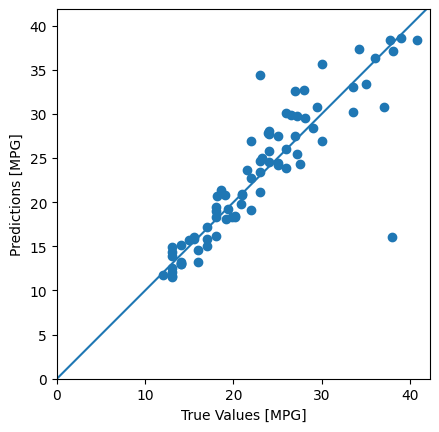

In [39]:
plt.scatter(Y_test,prediction)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [42]:
rmse=np.sqrt(mean_squared_error(Y_test,prediction))

print('RMSE: ',rmse)

print('R_square:', r2_score(Y_test,prediction))


RMSE:  3.561380383483637
R_square: 0.7672877025740429


# Lets predict for a single car

In [43]:
list1=[[4,97,100,5000,14.5,70,3]]
list1=sc.transform(list1)
list1

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.83920747, -0.90454337, -0.0995444 ,  2.42535646, -0.37958917,
        -1.62933005,  1.72878276]])

In [44]:
prediction2=model.predict(list1)

1/1 [==============================] - 0s 35ms/step


In [45]:
prediction2

array([[20.280455]], dtype=float32)

In [46]:
list2=[[8,307,130,3504,12,70,1]]
list2=sc.transform(list2)
list2

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.52188861,  1.11446083,  0.67615842,  0.64959007, -1.27103134,
        -1.62933005, -0.74203461]])

In [47]:
prediction3=model.predict(list2)
prediction3

1/1 [==============================] - 0s 35ms/step


array([[17.685974]], dtype=float32)

In [ ]:
from flask import Flask, render_template,url_for,request,jsonify
import joblib
import os
import pickle
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler


sc=StandardScaler()

app = Flask(__name__)

@app.route("/")
def index():
    return render_template('home.html')

@app.route('/result',methods=['POST','GET'])
def result():
    cylinders=int(request.form["cylinders"])
    displacement=int(request.form["displacement"])
    horsepower=int(request.form["horsepower"])
    weight=int(request.form["weight"])
    acceleration=int(request.form["acceleration"])
    model_year=int(request.form["model_year"])
    origin=int(request.form["origin"])
    
    values=[[cylinders,displacement,horsepower,weight,acceleration,model_year,origin]]

    #scaler_path=os.path.join(os.path.dirname('D:/Python37/Projects/Fuel Efficiency Prediction using ANN/models/'),'scaler.pkl')
    scaler_path=os.path.join(os.path.dirname('D:/Notebooks/data/Fuel-Efficiency-Prediction-using-ANN-main/'),'scaler.pkl')
    sc=None
    with open(scaler_path,'rb') as f:
        sc=pickle.load(f)
        
    values=sc.transform(values)

    #model=load_model(r"D:\Python37\Projects\Fuel Efficiency Prediction using ANN\models\model.h5")
    model=load_model("model.h5")

    prediction=model.predict(values)
    prediction=float(prediction)
    print(prediction)
    
    json_dict={
        "prediction":prediction
    }   
    
    return jsonify(json_dict)
    
if __name__=="__main__":
    #app.run(debug=True,port=3298)
    app.run(debug=True, use_reloader=False,port=3298)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:3298
Press CTRL+C to quit
127.0.0.1 - - [24/Sep/2023 23:07:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/Sep/2023 23:07:27] "POST /result HTTP/1.1" 500 -
Traceback (most recent call last):
  File "D:\shanu_user\Lib\site-packages\flask\app.py", line 2552, in __call__
    return self.wsgi_app(environ, start_response)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\shanu_user\Lib\site-packages\flask\app.py", line 2532, in wsgi_app
    response = self.handle_exception(e)
               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\shanu_user\Lib\site-packages\flask\app.py", line 2529, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\shanu_user\Lib\site-packages\flask\app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\shanu_user\Lib\site-packages\flask\app.py", line 1823, in full_dispatch_request
    rv = self.dispa

1/1 [==============================] - 0s 454ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_11724\3976237251.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction=float(prediction)
127.0.0.1 - - [24/Sep/2023 23:08:16] "POST /result HTTP/1.1" 200 -


28.363710403442383


127.0.0.1 - - [24/Sep/2023 23:08:25] "GET / HTTP/1.1" 200 -
